# [Pandas](http://pandas.pydata.org)

Библиотека для работы с данными и таблицами в питоне.

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as plt

## Основные структуры

Основными структурами данных в **Pandas** являются классы **Series** и **DataFrame**.  
Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Мы можем думать о Series как о векторе из [numpy](https://numpy.org/).  

## [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

Одномерный индексированный массив данных некоторого фиксированного типа. Мы можем думать о Series как о массиве из [numpy](https://numpy.org/).

In [107]:
salaries = pd.Series(data = [80000, 67000, 75000],
           index = ['Андрей', 'Владимир', 'Мария Антуанетта'])
print(salaries)

Андрей              80000
Владимир            67000
Мария Антуанетта    75000
dtype: int64


In [109]:
type(salaries)
salaries['Андрей']

80000

### Возможности Series

#### Собственные методы
Некоторые популярные процедуры для работы с данными реализованы как собственные методы типа Series

In [110]:
salaries.mean(), salaries.std(), salaries.quantile(.75)

(74000.0, 6557.438524302001, 77500.0)

#### Использлвание numpy

Функции numpy принимают Series и могут с ними работать. Согласно [документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#series-is-ndarray-like) `Series acts very similarly to a ndarray and is a valid argument to most NumPy functions.`. Это означает, что часто функции из numpy отработают с Series как с np.ndarray

In [111]:
np.mean(salaries)

74000.0

In [112]:
np.log2(salaries)

Андрей              16.2877
Владимир            16.0319
Мария Антуанетта    16.1946
dtype: float64

Series поддерживают операторы сравнения:

In [113]:
big_salaries = salaries > salaries.mean()
big_salaries

Андрей               True
Владимир            False
Мария Антуанетта     True
dtype: bool

Индексацию коллекцией булов типов можно использовать для построения выборки из Series по условию:

In [114]:
salaries[salaries > salaries.mean()] #по сути используем булеву маску в numpy array

Андрей              80000
Мария Антуанетта    75000
dtype: int64

In [115]:
salaries[[True, False, False]]

Андрей    80000
dtype: int64

Мы можем обращаться к элементам pd.Series как `salaries['Name']` или `salaries.Name`. Вариант через точку менее гибок: нельзя обратиться к имени, содержащему пробел, например

In [116]:
salaries.Андрей, salaries['Андрей']

(80000, 80000)

Можно добавлять новые элементы, обращаясь к несуществующему элементу:

In [117]:
salaries['Кот'] = 100500
salaries

Андрей               80000
Владимир             67000
Мария Антуанетта     75000
Кот                 100500
dtype: int64

 Также, значением в pd.Series может быть `np.nan` (not a number), который может быть написан явно, а может соответствовать неизвестному значению в исходных данных:  

In [118]:
salaries['Шрек Третий'] = np.nan
salaries

Андрей               80000.0
Владимир             67000.0
Мария Антуанетта     75000.0
Кот                 100500.0
Шрек Третий              NaN
dtype: float64

В данных часто бывают пропуски, поэтому вы часто будете видеть `np.nan`.  
Важно уметь находить их и обрабатывать.  
Получим битовую маску для пропущенных значений: 

In [119]:
salaries.isnull()

Андрей              False
Владимир            False
Мария Антуанетта    False
Кот                 False
Шрек Третий          True
dtype: bool

In [ ]:
salaries[salaries.isnull()]

Назначим минимальную зарплату всем, у кого ее нет: 

In [ ]:
salaries[salaries.isnull()] = 1
salaries
# 1: 50000
# 2: 45000
# 3: 55000
# 4: 50000
# 5: 1000000000000


Андрей               80000.0
Владимир             67000.0
Мария Антуанетта     75000.0
Кот                 100500.0
Шрек Третий              1.0
dtype: float64

## [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

**Dataframe** - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. 

Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

### Создание Датафрейма 

Создадим pd.DataFrame из единичной numpy-матрицы:

In [121]:
df1 = pd.DataFrame(data = np.eye(3),
                   index=['a', 'b', 'c'],
                   columns=['col1', 'col2', 'col3'],
                   dtype=int)
df1

,col1,col2,col3
a,1,0,0
b,0,1,0
c,0,0,1


Можно создавать pd.DataFrame из словаря.  
Ключами будут названия столбцов, а значениями - списки значений в этих столбцах.  
pd.DataFrame может хранить значения любых типов. Но в пределах одного столбца тип может быть только один:  

In [122]:
dictionary = {
    'A': np.arange(3),
    'B': ['a', 'b', 'c'],
    'C': np.arange(3) > 1
}
df1 = pd.DataFrame(dictionary)
df1

,A,B,C
0,0,a,False
1,1,b,False
2,2,c,True


Столбцу присваивается тип numpy.array, из которого он появился, но в общем случае тип столбца [не обязан](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.api.extensions.ExtensionDtype.html#pandas.api.extensions.ExtensionDtype) быть нумпаевским типом

In [ ]:
df1.dtypes

## Индексация: at, loc, iloc.

Можем обращаться к отдельному элементу в таблице через `at` (это быстро):

In [123]:
df1.at[2, 'B']

'c'

Можем обращаться к куску таблицы через loc (это всего лишь в [22 раза медленнее](https://stackoverflow.com/questions/37216485/pandas-at-versus-loc), чем at):

In [124]:
df1.loc[1:2, ['A', 'B']]

,A,B
1,1,b
2,2,c


Чтобы обращаться к столбцу по индексу (они там есть, хоть явно и не указаны) можно воспользоваться функцией `iloc`, которая работает аналогично `loc`

In [125]:
df1.iloc[1:3, 1:3]

,B,C
1,b,False
2,c,True


Можем изменять элементы, обращаясь к ним через `at` и присваивая значение:

In [126]:
df1.at[2, 'B'] = 'ну, пусть так'
df1

,A,B,C
0,0,a,False
1,1,b,False
2,2,"ну, пусть так",True


С помощью loc можно изменять сразу всю строку.  
И даже создавать новые. Заметим, что индексы вообще говоря идут совсем не подряд и даже не по порядку.

In [127]:
df1.loc[2] = [2,'c', True]
df1.loc[17] = [17, '!', False]
df1.loc[9] = [9, '!', False]
df1

,A,B,C
0,0,a,False
1,1,b,False
2,2,c,True
17,17,!,False
9,9,!,False


Чтобы удалить строки, можно воспользоваться функцией `drop`

In [128]:
df1 = df1.drop([1,9,17])
df1

,A,B,C
0,0,a,False
2,2,c,True


## [copy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html), [reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html), nan-ы

Создадим копию нашей таблицы без последнего столбца.  
Затем, присоединим новую таблицу к старой и посмотрим, что будет.

In [130]:
df1_copy = df1.copy().loc[:, ['A', 'B']]
df1_copy = pd.concat([df1, df1_copy])
df1_copy

,A,B,C
0,0,a,False
2,2,c,True
0,0,a,NaN
2,2,c,NaN


Вообще говоря так делать - плохо, потому что появляются дубли индексов и это ломает доступ по индексу, так как обращение становится неоднозначным.

In [131]:
try:
    df1_copy[0]
except KeyError:
    print('too many objects with the same index')

too many objects with the same index


Чтобы индексация была валидной, нужно провести реиндексацию фрейма.

In [132]:
df1_copy.reset_index(drop=True) # флаг drop - означает, что мы удаляем старый индекс, иначе - он просто станет столбцом

,A,B,C
0,0,a,False
1,2,c,True
2,0,a,NaN
3,2,c,NaN


Вот теперь можно валидно работать с таблицей.

Заметим, что 
* при взятии loc и других операций начальная таблица не изменяется
* значения, которые мы не знали, заполнились NaN.

Давайте выкинем все строки/столбцы, в которых есть NaN. (Для столбцов - `axis=1`)

In [133]:
df1_copy.dropna(axis=0)

,A,B,C
0,0,a,False
2,2,c,True


Заменим все NaN каким-то значением:

In [134]:
df1_copy.fillna(False)

C:\Users\79222\AppData\Local\Temp\ipykernel_19716\1702493052.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1_copy.fillna(False)


,A,B,C
0,0,a,False
2,2,c,True
0,0,a,False
2,2,c,False


## Нечисловые индексы. MultiIndex.
Вообще говоря, никто не запрещает делать нечисловые индексы, как и колонки. В этом случае к ним придется обращаться по тому индексу, как они обозначены.

In [135]:
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']
df3 = pd.DataFrame({
   'http_status': [200,200,404,404,301],
   'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]},
    index=index)
df3

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


In [136]:
df3.loc['Firefox']

http_status      200.00
response_time      0.04
Name: Firefox, dtype: float64

`iloc` будет работать с обычными индексами по строке

In [137]:
df3.iloc[0,1]

0.04

Нечисловая индексация особо часто встречается при группировках - о них ниже.

Можно делать еще более сложные вещи, а именно многоуровневые индексы и многоуровневые колонки. Именно благодаря устройству мультииндексов мы можем удобно группировать объекты. 

In [138]:
idx = pd.MultiIndex.from_product([['Zara', 'LV', 'Roots'],
                                  ['Orders', 'GMV', 'AOV']],
                                 names=['Brand', 'Metric'])
col = ['Yesterday', 'Yesterday-1', 'Yesterday-7', 'Thirty day average']

df_mul = pd.DataFrame('-', idx, col)
df_mul

Yesterday Yesterday-1 Yesterday-7 Thirty day average
Brand Metric                                                     
Zara  Orders         -           -           -                  -
      GMV            -           -           -                  -
      AOV            -           -           -                  -
LV    Orders         -           -           -                  -
      GMV            -           -           -                  -
      AOV            -           -           -                  -
Roots Orders         -           -           -                  -
      GMV            -           -           -                  -
      AOV            -           -           -                  -

In [139]:
df_mul.loc['Zara', 'Orders']

Yesterday             -
Yesterday-1           -
Yesterday-7           -
Thirty day average    -
Name: (Zara, Orders), dtype: object

In [140]:
df_mul.at[('Zara', 'Orders'), 'Yesterday-1']

'-'

## Чтение из файла

Основным форматом для хранения и передачи фреймов является - `CSV` (comma separated values / разделение по запятой). Можно читать данные абсолютно разных форматов `.txt`, `.tsv` или `.xlsx`. Но нужно аккуратно работать с `header`-ами и индексами, чтобы данные не потерялись.
* [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)
* [read_fwf](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_fwf.html#pandas.read_fwf)
* [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

Загрузим небольшой csv-файл по финансовой отчетности.

In [141]:
df = pd.read_csv('../data/data_type.csv')

In [142]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002.0,Quest Industries,"$125,000.00",$162500.00,30.00%,500,1,10,2015,Y
1,552278.0,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700,6,15,2014,Y
2,23477.0,ACME Industrial,"$50,000.00",$62500.00,25.00%,125,3,29,2016,Y
3,24900.0,Brekke LTD,"$350,000.00",$490000.00,4.00%,75,10,27,2015,Y
4,651029.0,Harbor Co,"$15,000.00",$12750.00,-15.00%,Closed,2,2,2014,N


В Jupyter-ноутбуках датафреймы `Pandas` выводятся в виде вот таких красивых табличек, и `print(df)` выглядит хуже.

In [143]:
print(df)

   Customer Number     Customer Name         2016          2017  \
0          10002.0  Quest Industries  $125,000.00    $162500.00   
1         552278.0    Smith Plumbing  $920,000.00  $101,2000.00   
2          23477.0   ACME Industrial   $50,000.00     $62500.00   
3          24900.0        Brekke LTD  $350,000.00    $490000.00   
4         651029.0         Harbor Co   $15,000.00     $12750.00   

  Percent Growth Jan Units  Month  Day  Year Active  
0         30.00%       500      1   10  2015      Y  
1         10.00%       700      6   15  2014      Y  
2         25.00%       125      3   29  2016      Y  
3          4.00%        75     10   27  2015      Y  
4        -15.00%    Closed      2    2  2014      N  


Размеры матрицы получаем как в numpy

In [144]:
df.shape

(5, 10)

И можно получить имена колонок

In [ ]:
df.columns

Index(['Customer Number', 'Customer Name', '2016', '2017', 'Percent Growth',
       'Jan Units', 'Month', 'Day', 'Year', 'Active'],
      dtype='object')

## [Типы данных](https://pbpython.com/pandas_dtypes.html) 


Чтобы посмотреть общую информацию по датафрейму и всем признакам, воспользуемся методом **`info`**:

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Number  5 non-null      float64
 1   Customer Name    5 non-null      object 
 2   2016             5 non-null      object 
 3   2017             5 non-null      object 
 4   Percent Growth   5 non-null      object 
 5   Jan Units        5 non-null      object 
 6   Month            5 non-null      int64  
 7   Day              5 non-null      int64  
 8   Year             5 non-null      int64  
 9   Active           5 non-null      object 
dtypes: float64(1), int64(3), object(6)
memory usage: 532.0+ bytes


На самом деле в pandas есть всего 5 основных типов данных: `bool`, `int64`, `float64`,`datetime64` и `object`. Любая строка, функция, класс - все 'сложное' воспринимается как `object`.

## Предобработка типов

**Изменить тип колонки** можно с помощью метода `astype`.

In [147]:
df['Customer Number'] = df['Customer Number'].astype('int64')

Признак `Jan Units` так кастануть не выйдет из-за значения `Closed`. Но так как - это исключительное значение, мы можем произвести каст через `to_numeric`, тогда все, что не кастуется, заменится на `Nan`.

In [148]:
df['Jan Units'] = pd.to_numeric(df['Jan Units'], errors='coerce') #флаг errors - чтобы то, что не скастовалось стало Nan.

Получить дату можно с помощью метода `to_datetime`

In [ ]:
df['Date'] = pd.to_datetime(df[[]'Month', 'Day', 'Year']) #заметим как легко мы создали новую колонку

In [150]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,Date
0,10002,Quest Industries,"$125,000.00",$162500.00,30.00%,500.0,1,10,2015,Y,2015-01-10
1,552278,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700.0,6,15,2014,Y,2014-06-15
2,23477,ACME Industrial,"$50,000.00",$62500.00,25.00%,125.0,3,29,2016,Y,2016-03-29
3,24900,Brekke LTD,"$350,000.00",$490000.00,4.00%,75.0,10,27,2015,Y,2015-10-27
4,651029,Harbor Co,"$15,000.00",$12750.00,-15.00%,NaN,2,2,2014,N,2014-02-02


## Методы [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html), [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html), [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html).

Чтобы выполнить замену по словарю в колонке `Active` можно воспользоваться методом `pd.Series.map` или `pd.DataFrame.replace`.

In [151]:
d = {'N' : False, 'Y' : True}
df['Active'].map(d)

0     True
1     True
2     True
3     True
4    False
Name: Active, dtype: bool

In [152]:
df = df.replace({'Active': d})
df

C:\Users\79222\AppData\Local\Temp\ipykernel_19716\584808572.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Active': d})


,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,Date
0,10002,Quest Industries,"$125,000.00",$162500.00,30.00%,500.0,1,10,2015,True,2015-01-10
1,552278,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700.0,6,15,2014,True,2014-06-15
2,23477,ACME Industrial,"$50,000.00",$62500.00,25.00%,125.0,3,29,2016,True,2016-03-29
3,24900,Brekke LTD,"$350,000.00",$490000.00,4.00%,75.0,10,27,2015,True,2015-10-27
4,651029,Harbor Co,"$15,000.00",$12750.00,-15.00%,NaN,2,2,2014,False,2014-02-02


`map` позволяет в качестве аргумента передать функцию, а не только маппинг или значение. `map` работает с Series, а `replace` с DataFrame. Обычно для одного и того же маппинга `replace` медленнее, так как задизайнен для работы с датафреймом и вынужден новый фрейм собирать. Однако, если надо сделать маппинг для нескольких колонок, то `replace` начинает выигрывать у множественных вызовов `map`

Осталось только преобразовать колонки с деньгами и процентами во что-то численное, для этого воспользуемся методом `apply` и напишем lambda-функцию

In [153]:
convert = lambda x : float(x.replace(',','').replace('$', '').replace('%',''))

Эта функция убирает все ненужные символы из цифр и конвертирует строку в float. 

In [154]:
df['2016'] = df['2016'].apply(convert)
df['2017'] = df['2017'].apply(convert)
df['Percent Growth'] = df['Percent Growth'].apply(convert)

In [155]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,Date
0,10002,Quest Industries,125000.0,162500.0,30.0,500.0,1,10,2015,True,2015-01-10
1,552278,Smith Plumbing,920000.0,1012000.0,10.0,700.0,6,15,2014,True,2014-06-15
2,23477,ACME Industrial,50000.0,62500.0,25.0,125.0,3,29,2016,True,2016-03-29
3,24900,Brekke LTD,350000.0,490000.0,4.0,75.0,10,27,2015,True,2015-10-27
4,651029,Harbor Co,15000.0,12750.0,-15.0,NaN,2,2,2014,False,2014-02-02


## Настройки Pandas

Чтобы у нас не возникало проблемы с отображением `float` мы можем поменять настройки pandas.

In [ ]:
pd.set_option('display.precision', 4) #устанавливаем количество значящих (ненулевых) символов

In [ ]:
df

Также мы можем поменять отображение датафрейма с помощью `set_option`

In [ ]:
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 2)

In [ ]:
df

Этим можно пользоваться когда у вас очень большие таблицы. Сейчас нам это не нужно.

In [ ]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)

## Добавление и удаление колонок

Можно легко добавить колонку общей суммы(любой функции) для колонок `2016` и `2017`

In [156]:
df['Sum'] = df['2016'] + df['2017']

In [157]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,Date,Sum
0,10002,Quest Industries,125000.0,162500.0,30.0,500.0,1,10,2015,True,2015-01-10,287500.0
1,552278,Smith Plumbing,920000.0,1012000.0,10.0,700.0,6,15,2014,True,2014-06-15,1932000.0
2,23477,ACME Industrial,50000.0,62500.0,25.0,125.0,3,29,2016,True,2016-03-29,112500.0
3,24900,Brekke LTD,350000.0,490000.0,4.0,75.0,10,27,2015,True,2015-10-27,840000.0
4,651029,Harbor Co,15000.0,12750.0,-15.0,NaN,2,2,2014,False,2014-02-02,27750.0


Теперь нам не нужны отдельные колонки для годов и для дат, так как есть объеденненные. Давайте удалим их.

In [158]:
df_final = df.drop(['2016', '2017', 'Year', 'Month', 'Day'], axis=1) #обязательно указываем axis=1 для работы с колонками, а не со строками!

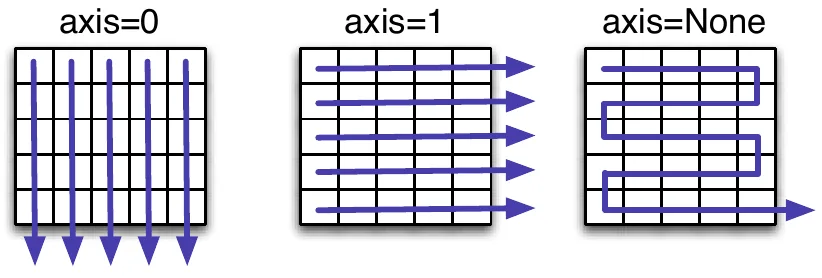

In [159]:
df_final

,Customer Number,Customer Name,Percent Growth,Jan Units,Active,Date,Sum
0,10002,Quest Industries,30.0,500.0,True,2015-01-10,287500.0
1,552278,Smith Plumbing,10.0,700.0,True,2014-06-15,1932000.0
2,23477,ACME Industrial,25.0,125.0,True,2016-03-29,112500.0
3,24900,Brekke LTD,4.0,75.0,True,2015-10-27,840000.0
4,651029,Harbor Co,-15.0,NaN,False,2014-02-02,27750.0


## Сортировка. Reindex.

Новые колонки добавились в конец, это не всегда удобно (Но обычно без разницы). Мы можем отсортировать колонки с помощью переиндексации. Мы задаем порядок названий колонок, и просим DataFrame выдать их в нужном порядке. 

In [ ]:
df_final.reindex(sorted(df_final.columns), axis=1)

Или можно сделать произвольную сортировку строк.

In [ ]:
df_final.reindex([4,3,0,1,2], axis=0)

Но обычно мы хотим отсортировать по значению колонки, для этого есть `sort_values`

In [ ]:
df_final.sort_values(by = 'Customer Name') #сортируем строки в алфавитном порядке

Можно сортировать сразу по нескольким критериям и устанавливать для них порядок.

In [ ]:
df_final.sort_values(by = ['Active', 'Date'], ascending=[1, 0])

## Индексация по маскам

Очень удобной является логическая индексация `DataFrame` по маске. 

Мы делаем условное выражение для **одного** столбца, а потом объединяем несколько условий в одну маску. 

In [ ]:
cond1 = df_final['Sum'] > 200000
cond2 = df_final['Date'] < '2015-06-01'

mask = cond1 & cond2
df_final[mask]

In [ ]:
# Или, что то же самое, но менее читаемо:
df_final[(df_final['Sum'] > 200000) & (df_final['Date'] < '2015-06-01')]

Заметим, что мы используем одинарные операторы `&` вместо `&&` или `and`. Вообще мыслить о маске лучше как о битовом векторе, к которому  мы поэлементно применяем битовую операцию. 

In [ ]:
cond1 ^ cond2 #xor почему бы и нет

## Строковые операции

Мы узнали, что в DataFrame отсутствует тип `string` и по сути все, что не число - является строкой. 

Но зато для Series - это не так, так как Series - это практически `numpy.ndarray`, в котором есть строки. Поэтому для работы со строками у нас есть специальные методы.

Возьмем данные с большим количеством строк, а именно... данные о сражениях в "Игре Престолов". 

In [ ]:
battles=pd.read_csv('../data/battles.csv')

In [ ]:
battles = battles.drop(['attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1', 'defender_2', 'defender_3', 'defender_4'], axis=1)

`head` - показывает несколько первых строк фрейма.

In [ ]:
battles.head()

Давайте найдем все битвы в которых был коммандующий Ланнистер или Старк, c помощью метода [pd.Series.str.contains](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html)

Мы будем работать дальше с колонкой командующих - уберем из нее Нан-ы.

In [ ]:
battles = battles[~ battles['attacker_commander'].isnull()].reset_index(drop=True) # ~ - отрицание условия

Найдем все битвы, в которых атакующими коммандирами выступали Ланнистеры или Старки.

In [ ]:
battles[battles['attacker_commander'].str.contains('Lannister|Stark', regex=True)]['name'] # можно искать по регулярному выражению

Сделаем датафрейм только главнокомандующих армий. Чтобы создать DataFrame, a не Series нужно поствить двойные квадратные скобки.

In [ ]:
commanders = battles[['attacker_commander']].dropna() # наны тоже почистим
commanders.head(3)

Работает это так: внешние скобки говорят о том,что мы чего-то берём по индексу. Внутренние - означают, что в качестве индекса мы передаём массив. Pandas видя массив в качестве индекса понимает, что мы хотим взять несколько значений и делает датафрейм, в который входят все перечисленные столбцы.
То есть, вот так тоже работает:

In [ ]:
cols = ['attacker_commander']
print(f'Наш cols - это обычный {type(cols)}')
commanders = battles[cols].dropna()
commanders.head(3)

Для удобства теперь заменим наименование колонки

In [ ]:
commanders = commanders.rename(columns={'attacker_commander': 'names'})

In [ ]:
commanders.head()

Заметим, что коммандующих может быть несколько. Давайте разделим их с помощью операции [pd.Series.split](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html). Не следует путать этот метод с `split` у питоновских строк, тот гораздо менее гибкий

In [ ]:
split_com = commanders['names'].str.split(", | and | &amp ")
split_com

Найдем максимальное количество коммандующих

### Разбиение листа

In [ ]:
v_len = np.vectorize(lambda x: len(x))
v_len(split_com)

Получили максимум 6 коммандующих - теперь можем их разделить.

In [ ]:
pd.DataFrame(split_com.tolist(), columns=['com1', 'com2', 'com3', 'com4', 'com5', 'com6'])

## [Группировка](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

В общем случае группировка данных в Pandas выглядит следующим образом:

```
df.groupby(by=grouping_columns)[columns_to_show].function()
```

1. К датафрейму применяется метод **`groupby`**, который разделяет данные по `grouping_columns` – признаку или набору признаков.
3. Индексируем по нужным нам столбцам (`columns_to_show`). 
2. К полученным группам применяется функция или несколько функций.

Выполним группировку по признаку `year`. Мы получим группировочный объект, от которого можно вызывать агрегирующие функции.

In [ ]:
battles.groupby(by=['year'])

`count` добавит единичку за каждый неNan объект в столбце.

In [ ]:
battles.groupby(by=['year']).count()

`battle_number` - признак без Nan, можем оставить только его

In [ ]:
battles.groupby(by=['year']).count()['battle_number']

Или можно сначала выбрать признак, а  потом вызвать агрегирующую операцию

In [ ]:
battles.groupby(by=['year'])['battle_number'].count()

### Сложные группировки
Можно делать и более сложные гриппировки по нескольким параметрам и с более сложными агрегирующими функциями.

Хотим сгруппироваться по году и региону и посчитать сколько всего там было сражающихся человек.

In [ ]:
G = battles.groupby(['year','region'])[['attacker_size', 'defender_size']].sum()
G.head()

In [ ]:
G['people'] = G['attacker_size'] + G['defender_size']

In [ ]:
G['people'].plot(kind='bar')
plt.grid()

## Прикладной Анализ Данных

Теперь посмотрим на небольшую аналитическую задачу по предсказанию ухода клиента от телефонного оператора.

In [ ]:
df = pd.read_csv('../data/telecom_churn.csv')
df.head(3)

Метод **`describe`** показывает основные статистические характеристики данных по каждому числовому признаку (типы `int64` и `float64`): число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [ ]:
df.describe()

Библиотека `seaborn` - более удобная замена `matplotib` в некоторых случаях. Например в рисовании ящиков с усами. Но при этом внутри она реализована на том же `matplotlib` 

In [ ]:
import seaborn as sns
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=df['Total day minutes'])
plt.subplot(1, 2, 2)
sns.histplot(df['Total day minutes']);
plt.grid()

Чтобы посмотреть статистику по нечисловым признакам, нужно явно указать интересующие нас типы в параметре `include`. Можно также задать `include`='all', чтоб вывести статистику по всем имеющимся признакам.

In [ ]:
df.describe(include=['object', 'bool'])

Для категориальных (тип `object`) и булевых (тип `bool`) признаков  можно воспользоваться методом **`value_counts`**. Посмотрим на распределение нашей целевой переменной — `Churn`:

In [ ]:
df['Churn'].value_counts()

2850 пользователей из 3333 — лояльные, значение переменной `Churn` у них — `0`.

Посмотрим на распределение пользователей по переменной `Area code`. Укажем значение параметра `normalize=True`, чтобы посмотреть не абсолютные числа, а долю от всего количества.

In [ ]:
df['Area code'].value_counts(normalize=True)

## Сводные таблицы

Допустим, мы хотим посмотреть, как наблюдения в нашей выборке распределены в контексте двух признаков — `Churn` и `Customer service calls`. Для этого мы можем построить **таблицу сопряженности**, воспользовавшись методом **`crosstab`**:

In [ ]:
pd.crosstab(df['Churn'], df['International plan'])

In [ ]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Мы видим, что большинство пользователей — лояльные и пользуются дополнительными услугами (международного роуминга / голосовой почты).

Продвинутые пользователи `Excel` наверняка вспомнят о такой фиче, как **сводные таблицы** (`pivot tables`). В `Pandas` за сводные таблицы отвечает метод **`pivot_table`**, который принимает в качестве параметров:

* `values` – список переменных, по которым требуется рассчитать нужные статистики,
* `index` – список переменных, по которым нужно сгруппировать данные,
* `aggfunc` — то, что нам, собственно, нужно посчитать по группам — сумму, среднее, максимум, минимум или что-то ещё.

Давайте посмотрим среднее число дневных, вечерних и ночных звонков для разных `Area code`:

In [ ]:
df.pivot_table(values = ['Total day calls', 'Total eve calls', 'Total night calls'],
               index = ['Area code'],
               aggfunc= lambda X: X.mean()) # можно запихать любую агрегирующую функцию


--------



## Первые попытки анализа данных


Посмотрим, как отток связан с признаком **"Подключение международного роуминга"** (`International plan`). Сделаем это с помощью сводной таблички `crosstab`, а также путем иллюстрации с `Seaborn`.

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6) # глобально зададим размер картинок

In [ ]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

In [ ]:
sns.countplot(x='International plan', hue='Churn', data=df);

Видим, что когда роуминг подключен, доля оттока намного выше – интересное наблюдение! Возможно, большие и плохо контролируемые траты в роуминге очень конфликтогенны и приводят к недовольству клиентов телеком-оператора и, соответственно, к их оттоку. 

Далее посмотрим на еще один важный признак – **"Число обращений в сервисный центр"** (`Customer service calls`). Также построим сводную таблицу и картинку.

In [ ]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True, normalize=True)

In [ ]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);
plt.grid()

Может быть, по сводной табличке это не так хорошо видно (или скучно ползать взглядом по строчкам с цифрами), а вот картинка красноречиво свидетельствует о том, что доля оттока сильно возрастает начиная с 4 звонков в сервисный центр. 

Добавим теперь в наш DataFrame бинарный признак — результат сравнения `Customer service calls > 3`. И еще раз посмотрим, как он связан с оттоком. 

In [ ]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

In [ ]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df);

Объединим рассмотренные выше условия и построим сводную табличку для этого объединения и оттока.

In [ ]:
pd.crosstab(df['Many_service_calls'] & df['International plan'].map({'No': 0, 'Yes':1}) ,
            df['Churn'])

Значит, прогнозируя отток клиента в случае, когда число звонков в сервисный центр больше 3 и подключен роуминг (и прогнозируя лояльность – в противном случае), можно ожидать около 85.8% правильных попаданий (ошибаемся всего 464 + 9 раз). Эти 85.8%, которые мы получили с помощью очень простых рассуждений – это неплохая отправная точка (*baseline*) для дальнейших моделей машинного обучения, которые мы будем строить. 

В целом до появления машинного обучения процесс анализа данных выглядел примерно так. Прорезюмируем:
    
- Доля лояльных клиентов в выборке – 85.5%. Самая наивная модель, ответ которой "Клиент всегда лоялен" на подобных данных будет угадывать примерно в  85.5% случаев. То есть доли правильных ответов (*accuracy*) последующих моделей должны быть как минимум не меньше, а лучше, значительно выше этой цифры;
- С помощью простого прогноза , который условно можно выразить такой формулой: "International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", можно ожидать долю угадываний 85.8%, что еще чуть выше 85.5%
- Эти два бейзлайна мы получили без всякого машинного обучения, и они служат отправной точной для наших последующих моделей. Если окажется, что мы громадными усилиями увеличиваем долю правильных ответов всего, скажем, на 0.5%, то возможно, мы что-то делаем не так, и достаточно ограничиться простой моделью из двух условий. 
- Перед обучением сложных моделей рекомендуется немного покрутить данные и проверить простые предположения. Более того, в бизнес-приложениях машинного обучения чаще всего начинают именно с простых решений, а потом экспериментируют с их усложнением. 

----------

## Полезные материалы

* [Оптимизация Pandas для больших данных](https://habr.com/en/company/ruvds/blog/442516/)
* [Pandas for Data Analysis](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#pandas-for-data-analysis)
* [Сборник полезных тетрадок по Pandas](https://github.com/HorusHeresyHeretic/Pandas_Practice)
* [Learn Pandas](https://bitbucket.org/hrojas/learn-pandas/src/master/)
* [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)
* [Reshape and Index](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)

## Источники материалов:
* [mlcourse.ai](https://github.com/Yorko/mlcourse.ai) - курс Машинного обучения с OpenDataScience
* [AI Seminars](https://github.com/AICommunityInno/Seminars) - семинары по Машинному обучению в Иннополисе
* [HSE-ML course](https://github.com/esokolov/ml-course-hse) - курс Машинного обучения ФКН ВШЭ